In [ ]:
done = False

# Homework 4 
### ASTR-324, University of Washington

## Problem 1

Assume we have a coin that has some probability $b$ of flipping to tails. That is, if the coin always flipped to tails, $b = 1$; if it always flipped to heads, $b = 0$; and if the coin were fair, $b = 0.5$.

### Likelihood

The likelihood function for a single coin toss returning heads or tails is:

$$
\begin{align}
p({\rm tails}\,|\,b) & = b \\
p({\rm heads}\,|\,b) & = 1-b
\end{align}
$$

If we define a variable $o$ which is $1$ if the outcome was tails, and 0 if it was heads, the above can be written compactly as:

$$ p(o\,|\,b) = b^o \cdot (1-b)^{1-o} $$

(which you can verify by inserting $o=1$ for tails and and $o=0$ for heads).

### Posterior

Following the Bayes theorem, the posterior for the parameter $b$ after every coin toss will be given by:

$$ p(b\,|\,o) = C \cdot p(o\,|\,b) \cdot p(b) $$

where $p(b)$ is our prior probability (our knowledge) of what $b$ was before the new coin toss. $C$ is the normalizing constant that makes sure the posterior integrates to 1.

### The problems

Get a coin (a real coin!), flip it 10 times, and record the results.

Assuming the initial prior probability $p(b) \propto {\rm const.}$ over the entire range of $b$:

1. Plot the posterior $p(b \,|\, o )$ after each flip. In every plot, also show the $p(b)$ before the toss (the prior).

2. After each flip, print the probability that your coin is approximately fair; that is, what is the probability 
   $p(0.4 < b < 0.6)$? 

3. After each flip, print the probability that your coin strongly prefers heads over tails; that is, what is the probability $p(b<0.25)$? 

Note #1: Don't forget to normalize your posteriors (i.e., compute and multiply by the factor $C$)! This is easily done numerically, for example:

```python
b = np.linspace(0,1,5000)
db = b[1]-b[0]

p = ... compute unnormalized posterior by multiplying likelihood and prior ...
C = 1. / (p * db).sum()  # Riemann sum with simple "rectangle rule"
p = C * p  # our normalized posterior
```

Hint: **Look at the lecture notes for similar computations!**

## Problem 2

Repeat the analysis of Problem 1, but starting with the [Jeffreys' prior](https://en.wikipedia.org/wiki/Jeffreys_prior):

$$ p(b) = b^{-0.5}(1-b)^{-0.5}$$

Discuss the difference in how the probabilities change with each coin toss, comparing them to what you obtained in Problem #1. How are they affected by the choice of initial prior? Is there a difference early on vs. after many flips?

Note: Jeffreys' prior is an [improper prior](https://en.wikipedia.org/wiki/Prior_probability#Improper_priors), with singularities (infinities) at $b=0$ and $b=1$. Therefore when you compute and plot it, choose a range some $\epsilon$ away from those (e.g., [0.00001, 0.99999], rather than a full range [0, 1]). Otherwise `numpy` and `matplotlib` will complain about infinities in plots where the Jeffreys prior shows up.

# Homework 4: Solutions

### Some useful definitions and functions

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=False)

## Problem 1: the coin toss

1. Plot the posterior $p(b \,|\, o )$ after each flip. In every plot, also show the $p(b)$ before the toss (the prior).

2. After each flip, print the probability that your coin is approximately fair; that is, what is the probability 
   $p(0.4 < b < 0.6)$? 

3. After each flip, print the probability that your coin strongly prefers heads over tails; that is, what is the probability $p(b<0.25)$? 

In [82]:
# fair_bounds = np.where((b>0.4) & (b<0.6))
# prefered_bounds = np.where(b <= 0.25)

In [83]:
# fairness = np.trapz(PP[fair_bounds],b[fair_bounds])
# preferred = np.trapz(PP[prefered_bounds],b[prefered_bounds])

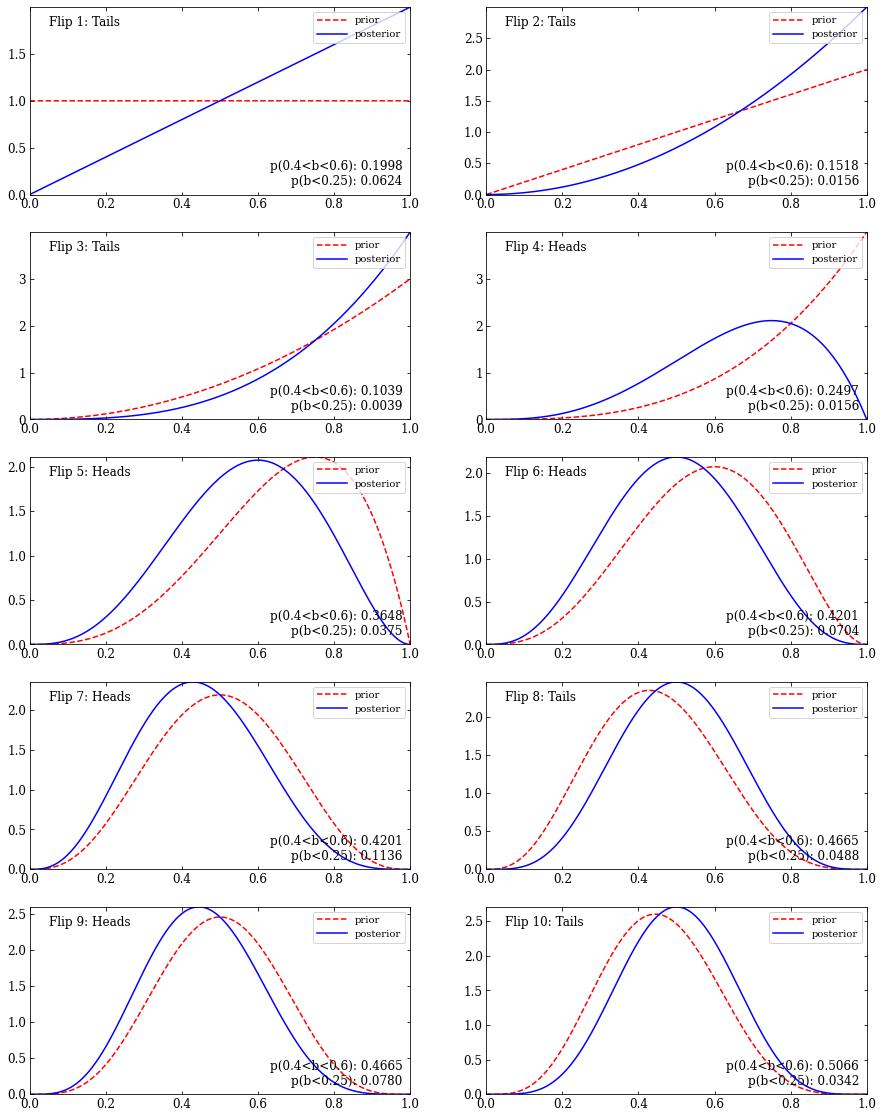

In [2]:
# the result of my coin flips, 0 = heads and 1 = tails

coinFlips = np.array([1,1,1,0,0,0,0,1,0,1])

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

b = np.linspace(0,1,5000)
db = b[1]-b[0]
names = ['Heads', 'Tails']

fair_bounds = np.where((b>0.4) & (b<0.6))
prefered_bounds = np.where(b <= 0.25)

for i in range(10):
    if i == 0:
        P = np.ones_like(b)
        x = coinFlips[0]
        L = (b**coinFlips[0])*((1-b)**(1-coinFlips[0]))
        PP = L*P
        C = 1. / (PP * db).sum()
        PP = PP * C
        
        # fairness calculations
        fairness = np.trapz(PP[fair_bounds],b[fair_bounds])
        preferred = np.trapz(PP[prefered_bounds],b[prefered_bounds])
        
        # plotting
        ax[0,0].plot(b, P, ls='--', c='red', label=r'prior')
        ax[0,0].plot(b,PP,ls='-', c='blue', label=r'posterior')
        ax[0,0].text(.05, 0.9, f'''Flip {i+1}: {names[coinFlips[i]]}''', transform=ax[0, 0].transAxes)
        ax[0,0].legend(loc = 1,fontsize = 'small');
        ax[0,0].text(0.98,0.05,f'''p(0.4<b<0.6): {fairness:.4f}\np(b<0.25): {preferred:.4f}''',horizontalalignment = 'right',transform=ax[0,0].transAxes)
    else:
        l = int(np.round(i/2-.05));
        w = np.mod(i,2);
        x = coinFlips[i]
        P = PP
        L = (b**coinFlips[i])*((1-b)**(1-coinFlips[i]))
        PP = L*P
        C = 1. / (PP * db).sum()
        PP = PP * C
        
        # fairness calculations
        fairness = np.trapz(PP[fair_bounds],b[fair_bounds])
        preferred = np.trapz(PP[prefered_bounds],b[prefered_bounds])
        
        # plotting
        ax[l, w].plot(b, P, ls='--', c='red', label=r'prior')
        ax[l, w].text(.05, 0.9, f'''Flip {i+1}: {names[coinFlips[i]]}''', transform=ax[l, w].transAxes)
        ax[l, w].plot(b,PP,ls='-', c='blue', label=r'posterior')
        ax[l, w].legend(loc = 1, fontsize = 'small');
        ax[l, w].text(0.98,0.05,f'''p(0.4<b<0.6): {fairness:.4f}\np(b<0.25): {preferred:.4f}''',horizontalalignment = 'right',transform=ax[l,w].transAxes);


## Problem 2: reanalysis with the Jeffreys prior

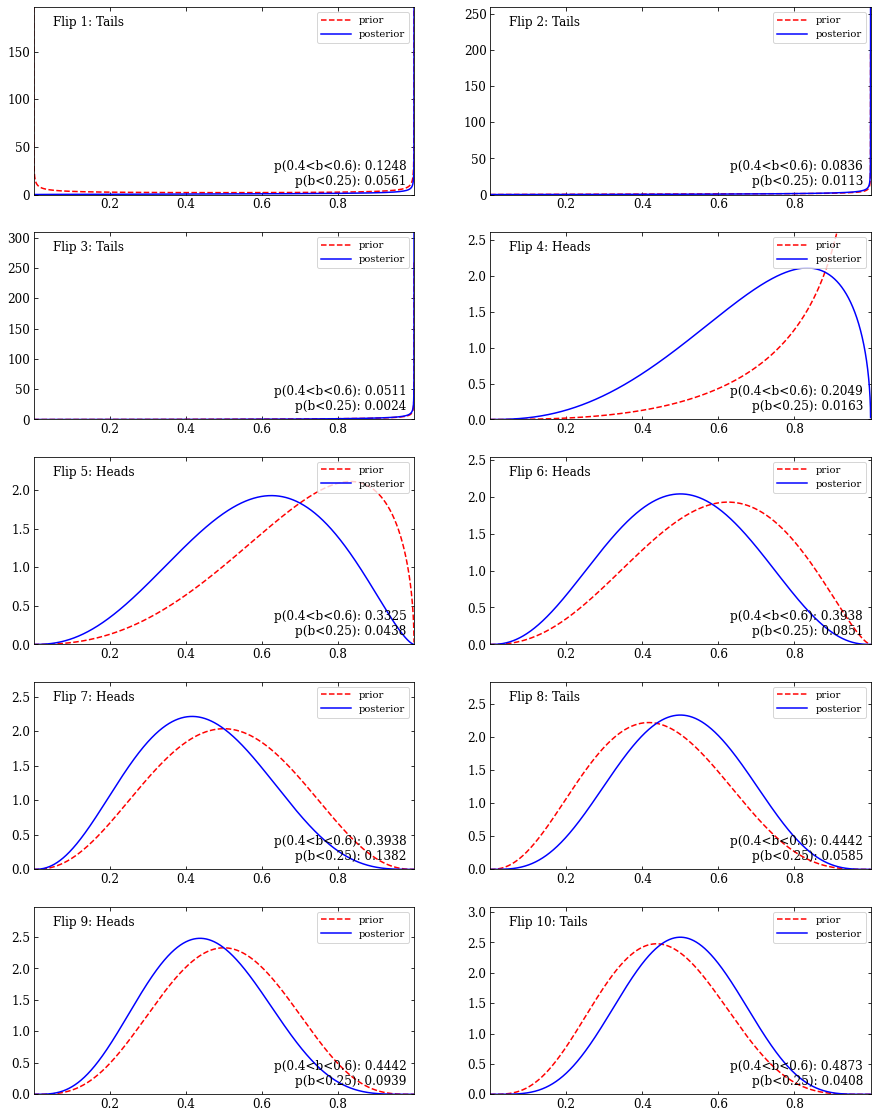

In [4]:
coinFlips = ([1,1,1,0,0,0,0,1,0,1]) #np.array([1,1,1,0,0,0,0,1,0,1])#

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

b = np.linspace(0.00001,1-0.00001,5000)
db = b[1]-b[0]
names = ['Heads', 'Tails'] # indicates that a 0 is heads, and a 1 is tails

fair_bounds = np.where((b>0.4) & (b<0.6))
prefered_bounds = np.where((b>0.00001) & (b <= 0.25))

for i in range(10):
    if i == 0:
        P = (b**(-.5))*((1-b)**(-.5))
        x = coinFlips[0]
        L = (b**coinFlips[i])*((1-b)**(1-coinFlips[i]))
        PP = L*P
        C = 1. / (PP * db).sum()
        PP = PP * C
        
        # fairness calculations
        fairness = np.trapz(PP[fair_bounds],b[fair_bounds])
        preferred = np.trapz(PP[prefered_bounds],b[prefered_bounds])
        
        # plotting
        ax[0,0].plot(b, P, ls='--', c='red', label=r'prior')
        ax[0,0].plot(b,PP,ls='-', c='blue', label=r'posterior')
        ax[0,0].text(.05, 0.9, f'''Flip {i+1}: {names[coinFlips[i]]}''', transform=ax[0, 0].transAxes)
        ax[0,0].legend(loc = 1,fontsize = 'small');
        ax[0,0].set_ylim(0,PP.max()+.5);
        ax[0,0].text(0.98,0.05,f'''p(0.4<b<0.6): {fairness:.4f}\np(b<0.25): {preferred:.4f}''',horizontalalignment = 'right',transform=ax[0,0].transAxes)

    else:
        l = int(np.round(i/2-.05));
        w = np.mod(i,2);
        x = coinFlips[i]
        P = PP
        L = (b**coinFlips[i])*((1-b)**(1-coinFlips[i]))
        L = (b**coinFlips[i])*((1-b)**(1-coinFlips[i]))
        PP = L*P
        C = 1. / (PP * db).sum()
        PP = PP * C
        
        # fairness calculations
        fairness = np.trapz(PP[fair_bounds],b[fair_bounds])
        preferred = np.trapz(PP[prefered_bounds],b[prefered_bounds])
        
        # plotting
        ax[l, w].plot(b, P, ls='--', c='red', label=r'prior')
        ax[l, w].text(.05, 0.9, f'''Flip {i+1}: {names[coinFlips[i]]}''', transform=ax[l, w].transAxes)
        ax[l, w].plot(b,PP,ls='-', c='blue', label=r'posterior')
        ax[l, w].set_ylim(0,PP.max()+.5);
        ax[l, w].legend(loc = 1, fontsize = 'small');
        ax[l, w].text(0.98,0.05,f'''p(0.4<b<0.6): {fairness:.4f}\np(b<0.25): {preferred:.4f}''',horizontalalignment = 'right',transform=ax[l,w].transAxes);


The fairness and preferential probabilities once reaching 10 flips are relatively the same between priors. The uniform prior in the first question gives me a 50.66% probability of the coin being fair, where Jeffreys prior gives me a 48.73% probability. The probability of the coin strongly preferring heads is low for both of these models as well. This tells us that the seleciton of the initial prior, no matter how improper, leads to a similar result after many iterations.

The first few iterations give different curves and probabilities for both priors. With Jeffreys prior, the first three flips being tails leads to a probability of the coin being fair at 5%. The prior in the first question gives a 10% probability that the coin is fair. After six flips, the coin's fairness probability for each prior becomes much closer: 39% for Jeffreys and 42% for the uniform one.

As I do more flips, both curves tend to converge to a fairness probability just around 50%. This tells us that the more flips I do, the less the initial prior matters in finding the fairness of the coin.